In [1]:
%pip install gymnasium
%pip install stable_baselines3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
import numpy as np
from gym_anytrading.envs import StocksEnv
import quantstats as qs
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import yfinance as yf
data = yf.download("VGT", start="2017-01-01", end="2023-04-30")

[*********************100%***********************]  1 of 1 completed


In [5]:
df = data

window_size = 10
start_index = window_size
end_index = len(df)

env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])

C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 2)
  logger.warn(
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [6]:
model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000)

Using cpu device


C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
C:\Users\12016\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, inf

-----------------------------
| time/              |      |
|    fps             | 2291 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------


In [7]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': 102.96001434326172, 'total_profit': 0.004507001925873957, 'position': 1}


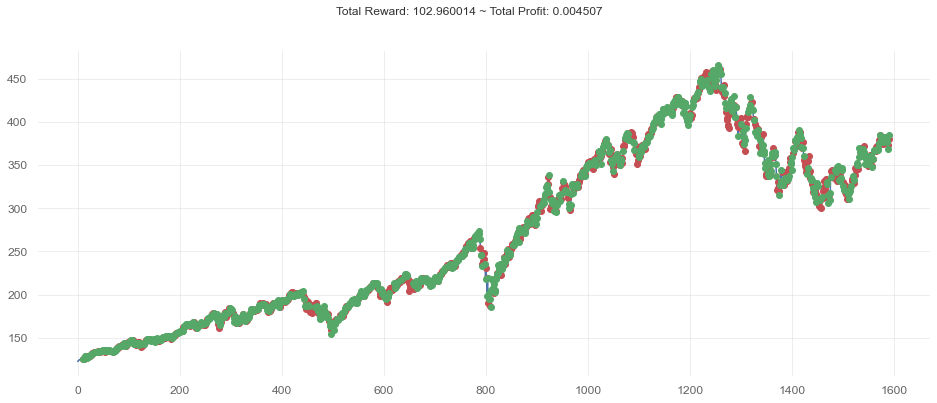

In [8]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

                           Strategy
-------------------------  ----------
Start Period               2017-01-20
End Period                 2023-04-28
Risk-Free Rate             0.0%
Time in Market             25.0%

Cumulative Return          -99.55%
CAGR﹪                     -44.83%

Sharpe                     -4.32
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -4.01
Sortino                    -4.48
Smart Sortino              -4.16
Sortino/√2                 -3.17
Smart Sortino/√2           -2.94
Omega                      0.17

Max Drawdown               -99.55%
Longest DD Days            2287
Volatility (ann.)          19.47%
Calmar                     -0.45
Skew                       -2.65
Kurtosis                   20.76

Expected Daily %           -0.34%
Expected Monthly %         -6.86%
Expected Yearly %          -53.78%
Kelly Criterion            -91.28%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.35%
Expected Shortfall (cVaR)  -2.35%

Max Consecu

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2017-01-23,2023-04-26,2023-04-28,2287,-99.5493,-99.501924


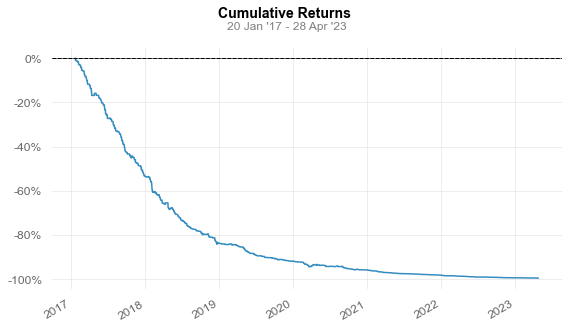

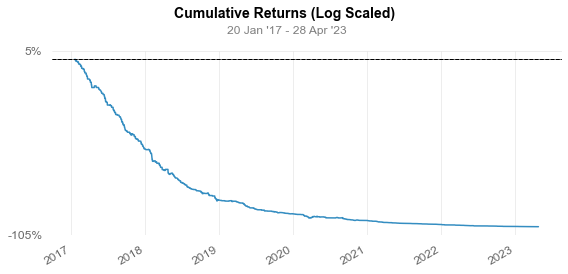

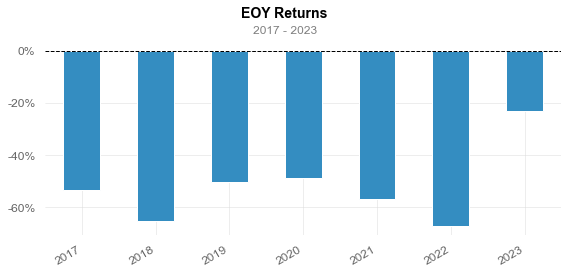

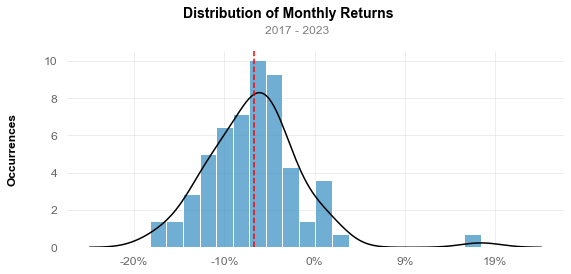

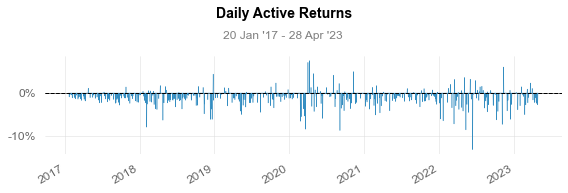

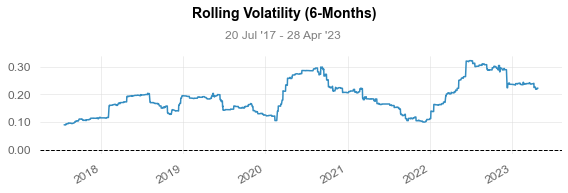

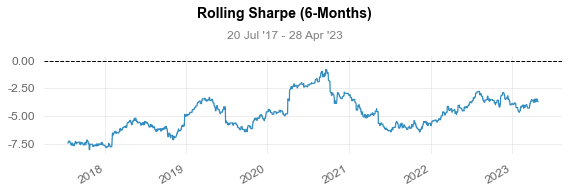

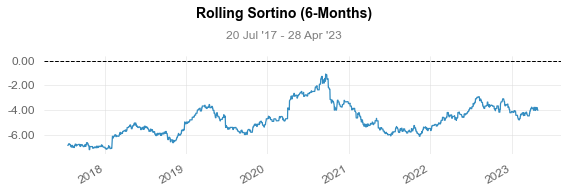

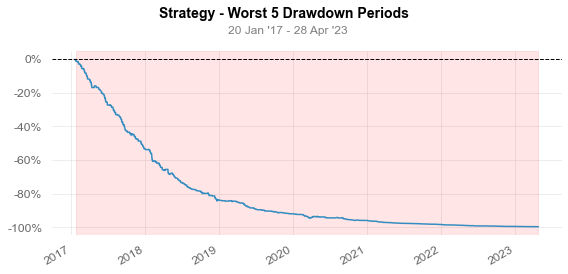

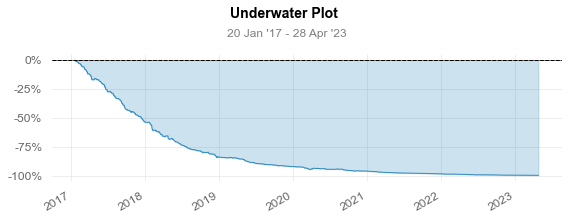

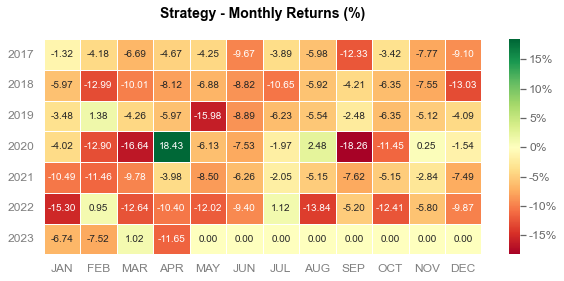

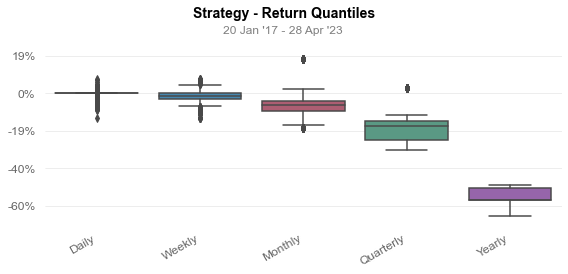

In [9]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)